In [28]:
### data analysis
import pandas as pd
import numpy as np

### visual
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
plt.style.use('default')
import matplotlib.colors as mcolors

### modeling kmeans n stardarization
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

### churn predict modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

### ignore warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
cd 'drive/MyDrive/Colab Notebooks/dsw'

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/dsw'
/content/drive/MyDrive/Colab Notebooks/dsw


# **About Data**

In [31]:
# load data
df = pd.read_csv('Telco_customer_churn.csv', delimiter=';')
pd.set_option('display.max.columns', 500)
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,Churn Label,Longitude,Latitude,CLTV
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,"70,005",Yes,"106,81667","-6,20000","4210,7"
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,"91,91",Yes,"106,81667","-6,20000","3511,3"
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,"129,545",Yes,"106,81667","-6,20000","6983,6"
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,"136,24",Yes,"106,81667","-6,20000","6503,9"
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,"134,81",Yes,"106,81667","-6,20000",6942


In [32]:
# read data column
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method', 'Monthly Purchase',
       'Churn Label', 'Longitude', 'Latitude', 'CLTV'],
      dtype='object')

In [33]:
# read unique value in column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: Customer ID - Unique Values: [   0    1    2 ... 7040 7041 7042]
Column: Tenure Months - Unique Values: [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
Column: Location - Unique Values: ['Jakarta' 'Bandung']
Column: Device Class - Unique Values: ['Mid End' 'High End' 'Low End']
Column: Games Product - Unique Values: ['Yes' 'No' 'No internet service']
Column: Music Product - Unique Values: ['Yes' 'No' 'No internet service']
Column: Education Product - Unique Values: ['No' 'Yes' 'No internet service']
Column: Call Center - Unique Values: ['No' 'Yes']
Column: Video Product - Unique Values: ['No' 'Yes' 'No internet service']
Column: Use MyApp - Unique Values: ['No' 'Yes' 'No internet service']
Column: Payment Method - Unique Values: ['Digital Wallet' 'Pulsa' 'Debit' 'Credit']
Column: Monthly Purchase - Unique

In [34]:
# returning tuple (row, col)
df.shape

(7043, 16)

In [35]:
# checking missing value
df.isnull().sum().sum()

0

In [36]:
# checking duplicate value
df.duplicated().sum()

0

In [37]:
# convert to numeric
df['Monthly Purchase'] = df['Monthly Purchase'].str.replace(',','.')
df['Monthly Purchase'] = pd.to_numeric(df['Monthly Purchase'])

In [38]:
# convert to numeric
df['CLTV'] = df['CLTV'].str.replace(',','.')
df['CLTV'] = pd.to_numeric(df['CLTV'])

In [39]:
# create new variable cleaned_df
cleaned_df = df.drop(['Customer ID','Latitude','Longitude'], axis=1)
print(cleaned_df.head())

   Tenure Months Location Device Class Games Product Music Product  \
0              2  Jakarta      Mid End           Yes           Yes   
1              2  Jakarta     High End            No            No   
2              8  Jakarta     High End            No            No   
3             28  Jakarta     High End            No            No   
4             49  Jakarta     High End            No           Yes   

  Education Product Call Center Video Product Use MyApp  Payment Method  \
0                No          No            No        No  Digital Wallet   
1                No          No            No        No           Pulsa   
2               Yes          No           Yes       Yes           Pulsa   
3               Yes         Yes           Yes       Yes           Pulsa   
4               Yes          No           Yes       Yes           Debit   

   Monthly Purchase Churn Label    CLTV  
0            70.005         Yes  4210.7  
1            91.910         Yes  3511.3  
2 

In [40]:
# check important value about dataframe
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tenure Months      7043 non-null   int64  
 1   Location           7043 non-null   object 
 2   Device Class       7043 non-null   object 
 3   Games Product      7043 non-null   object 
 4   Music Product      7043 non-null   object 
 5   Education Product  7043 non-null   object 
 6   Call Center        7043 non-null   object 
 7   Video Product      7043 non-null   object 
 8   Use MyApp          7043 non-null   object 
 9   Payment Method     7043 non-null   object 
 10  Monthly Purchase   7043 non-null   float64
 11  Churn Label        7043 non-null   object 
 12  CLTV               7043 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 715.4+ KB


# **EDA**

In [41]:
# encoding categorical data
for column in cleaned_df.columns:
    if pd.api.types.is_numeric_dtype(cleaned_df[column]):
      continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

       Tenure Months     Location  Device Class  Games Product  Music Product  \
count    7043.000000  7043.000000   7043.000000    7043.000000    7043.000000   
mean       32.371149     0.714326      0.904160       0.790004       0.906432   
std        24.559481     0.451767      0.879918       0.859848       0.880162   
min         0.000000     0.000000      0.000000       0.000000       0.000000   
25%         9.000000     0.000000      0.000000       0.000000       0.000000   
50%        29.000000     1.000000      1.000000       1.000000       1.000000   
75%        55.000000     1.000000      2.000000       2.000000       2.000000   
max        72.000000     1.000000      2.000000       2.000000       2.000000   

       Education Product  Call Center  Video Product    Use MyApp  \
count        7043.000000  7043.000000    7043.000000  7043.000000   
mean            0.904444     0.290217       0.985376     0.992475   
std             0.879949     0.453895       0.885002     0.8850

In [42]:
# statistical summary of dataframe
df.describe()

,Customer ID,Tenure Months,Monthly Purchase,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,84.190200,5720.384481
std,2033.283305,24.559481,39.117061,1537.974298
min,0.000000,0.000000,23.725000,2603.900000
25%,1760.500000,9.000000,46.150000,4509.700000
50%,3521.000000,29.000000,91.455000,5885.100000
75%,5281.500000,55.000000,116.805000,6994.650000
max,7042.000000,72.000000,154.375000,8450.000000


In [43]:
# summary of categorical data
df.describe(include='object')

,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Churn Label,Longitude,Latitude
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,3,3,3,3,2,3,3,4,2,2,2
top,Jakarta,High End,No,No,No,No,No,No,Pulsa,No,"106,81667","-6,20000"
freq,5031,3096,3498,3088,3095,4999,2810,2785,2365,5174,5031,5031


# **Data Visualization**

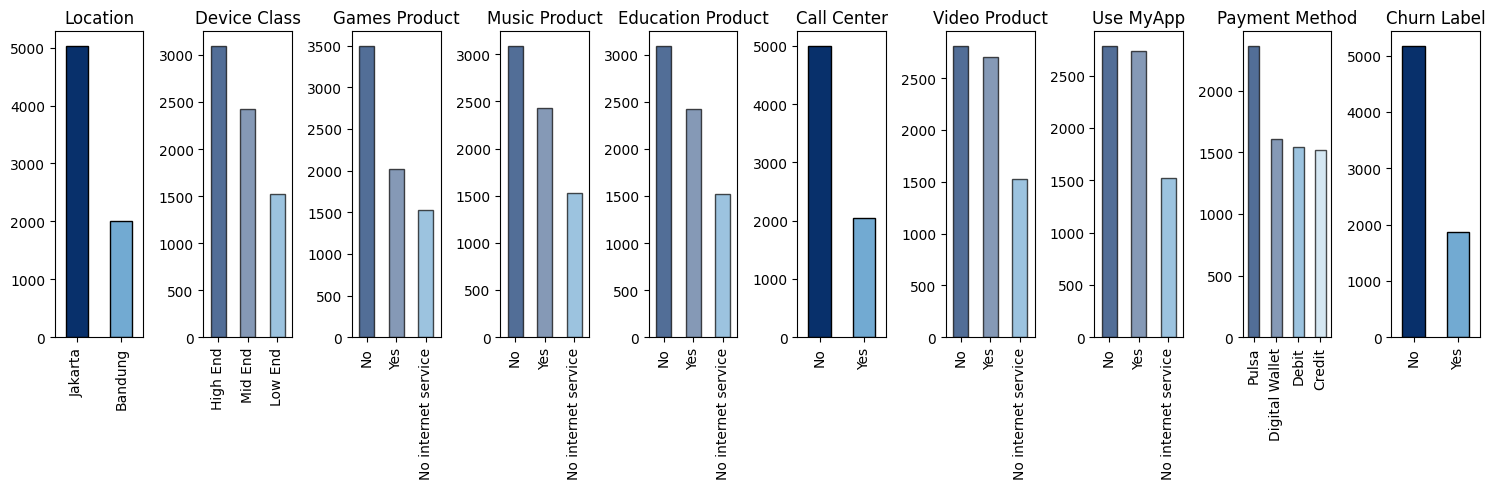

In [44]:
# observing the distribution of data using bar
cols = ['Location', 'Device Class', 'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method','Churn Label']
numerical = cols
colors = ['#08306B','#526E97', '#72AAD2', '#C4DEED', '#E3EEF8']

plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i + 1)
    value_counts = df[str(col)].value_counts()

    if len(value_counts) >= 3:
        min_value = min(value_counts)
        max_value = max(value_counts)
        n = len(value_counts)


        value_counts.plot(kind='bar', color=colors, edgecolor='k', alpha=0.7)
    else:
        value_counts.plot(kind='bar', color=['#08306B', '#72AAD2', '#C4DEED', '#E3EEF8'], edgecolor='k')

    ax.set_title(f"{col}")

plt.tight_layout()
plt.show()

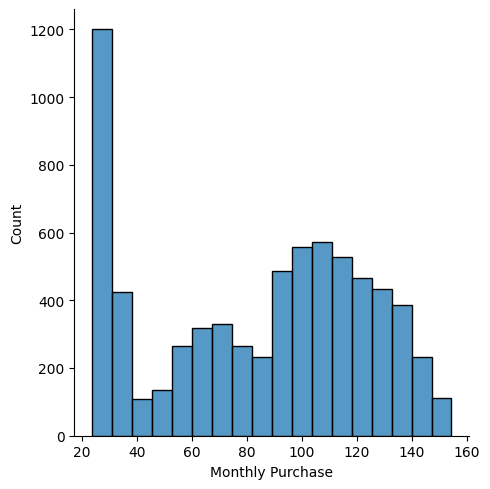

In [45]:
# Monthly Purchase Visualization
sns.displot(cleaned_df, x='Monthly Purchase')

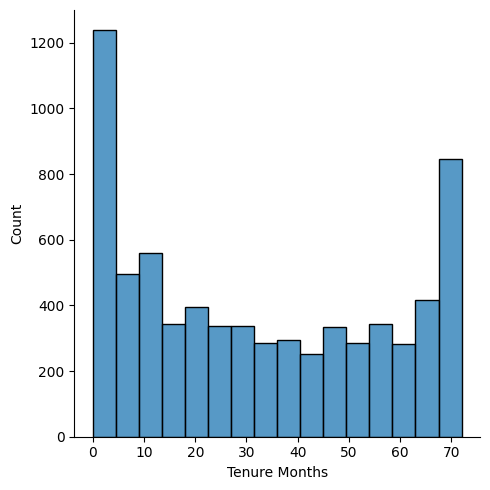

In [46]:
sns.displot(cleaned_df, x='Tenure Months')

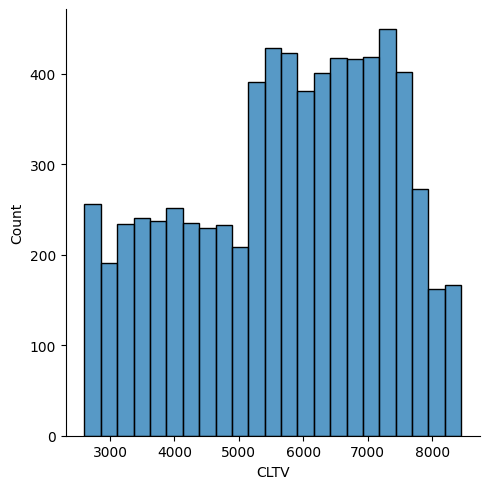

In [47]:
sns.displot(cleaned_df, x='CLTV')

# **Region Category**

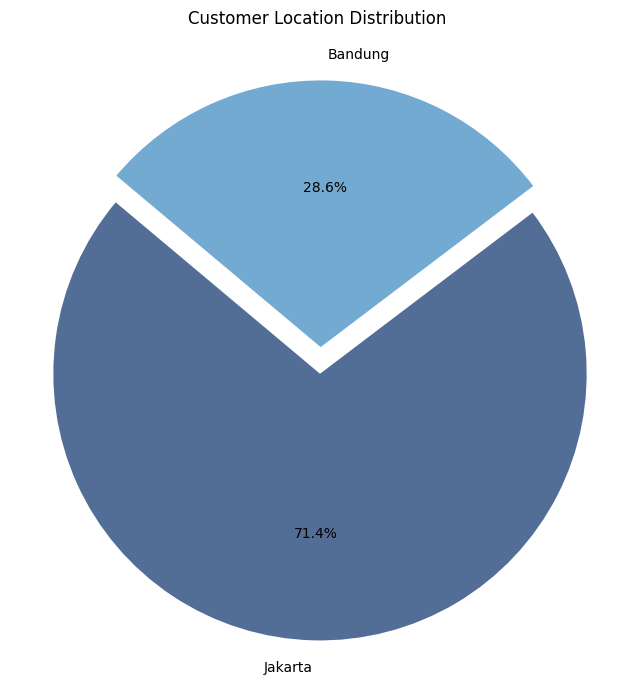

In [48]:
# Region Category
data = df['Location'].value_counts()
labels = data.index
colors = ['#526E97', '#72AAD2', '#C4DEED', '#E3EEF8'][:len(labels)]
explode = (0.1, 0, 0, 0, 0)[:len(labels)]
# plot location pie
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Customer Location Distribution \n')
plt.axis('equal')

plt.show()

# **Product Category**

In [129]:
list_product = df.groupby('Location')[['Games Product', 'Music Product', 'Education Product', 'Video Product']].describe()
list_product

Games Product                  Music Product                   \
                 count unique top  freq         count unique top  freq   
Location                                                                 
Bandung           2012      3  No   996          2012      3  No   878   
Jakarta           5031      3  No  2502          5031      3  No  2210   

         Education Product                  Video Product                   
                     count unique top  freq         count unique top  freq  
Location                                                                    
Bandung               2012      3  No   904          2012      3  No   817  
Jakarta               5031      3  No  2191          5031      3  No  1993

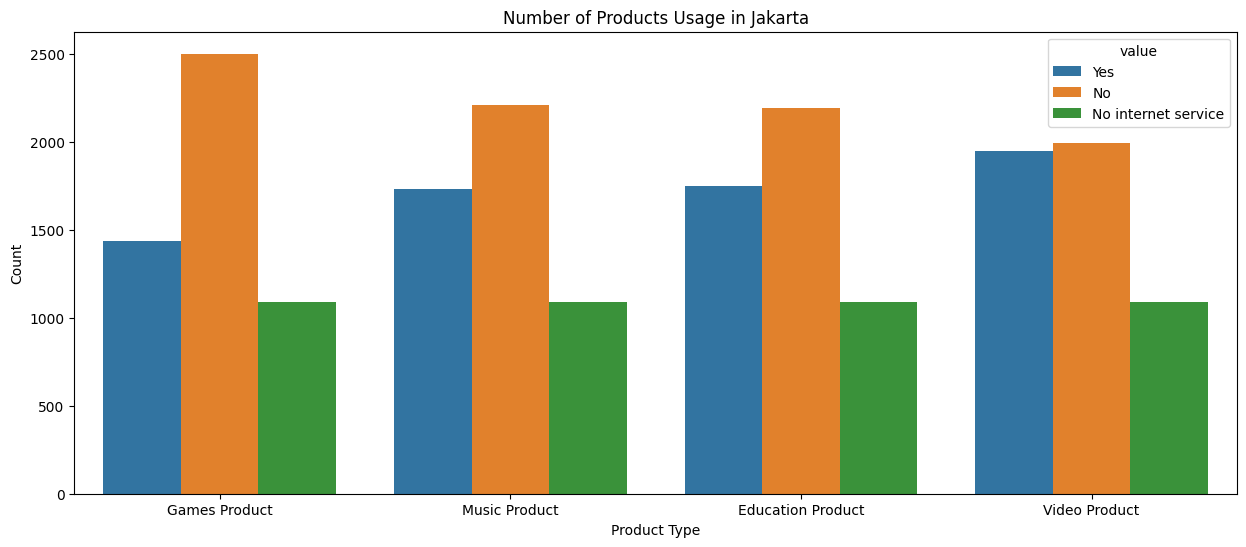

In [54]:
# Assuming df is your DataFrame and you want to plot counts of each product type
cols = ['Games Product', 'Music Product', 'Education Product', 'Video Product']

# Filter DataFrame for rows where 'Location' is 'Jakarta'
jakarta_df = df[df['Location'] == 'Jakarta'][cols]

# Reshape the data to use it in sns.barplot
melted_df = pd.melt(jakarta_df)

# Get the total count for each product type
total_counts = jakarta_df.sum()

# Plot the barplot
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
ax = sns.countplot(data=melted_df, x='variable', hue='value')

plt.title('Number of Products Usage in Jakarta')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

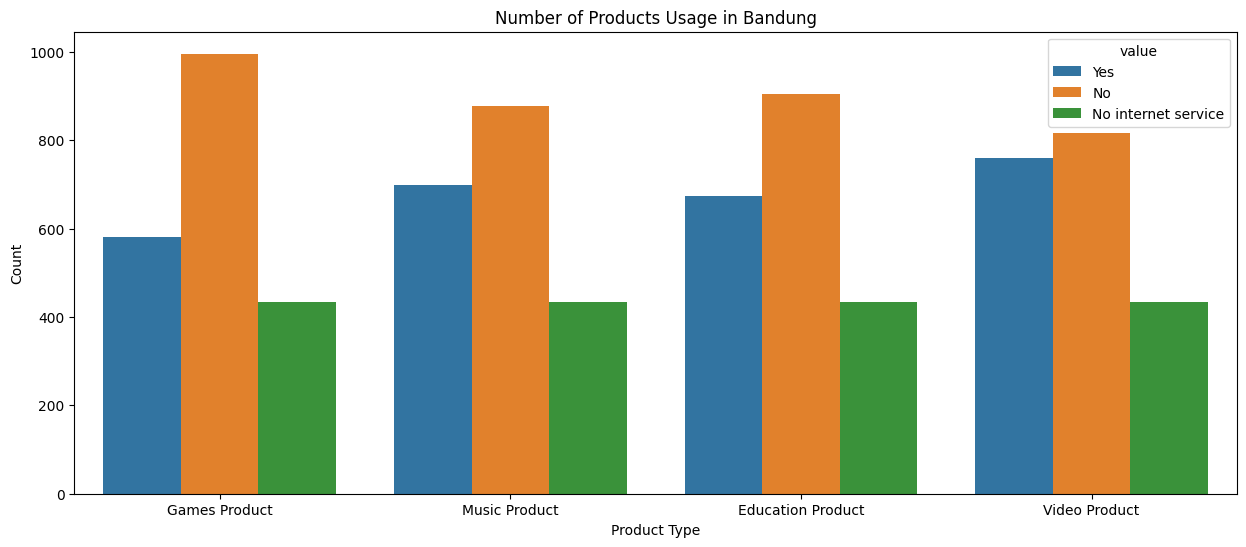

In [55]:
# Assuming df is your DataFrame and you want to plot counts of each product type
cols = ['Games Product', 'Music Product', 'Education Product', 'Video Product']

# Filter DataFrame for rows where 'Location' is 'Jakarta'
jakarta_df = df[df['Location'] == 'Bandung'][cols]

# Reshape the data to use it in sns.barplot
melted_df = pd.melt(jakarta_df)

# Get the total count for each product type
total_counts = jakarta_df.sum()

# Plot the barplot
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
ax = sns.countplot(data=melted_df, x='variable', hue='value')

plt.title('Number of Products Usage in Bandung')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

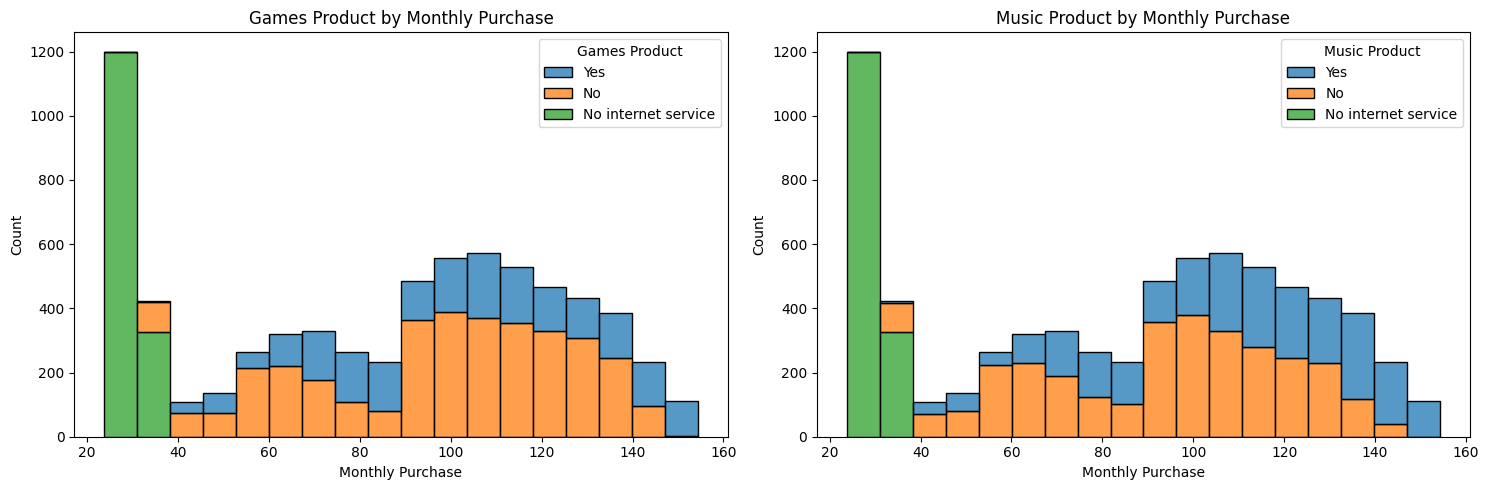

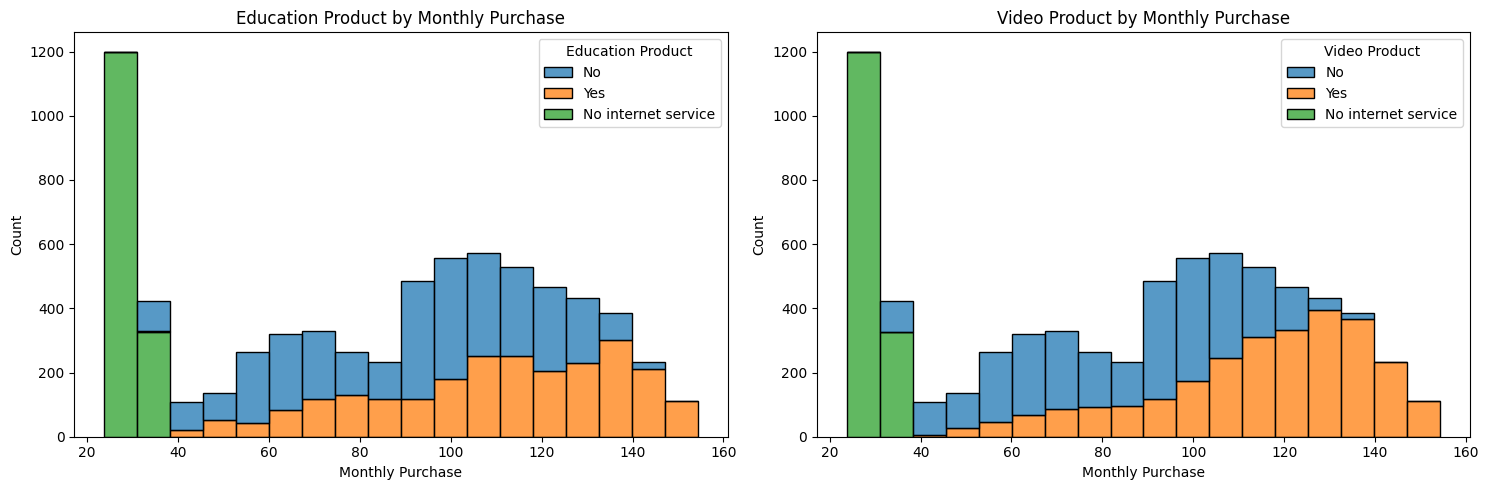

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Games Product by Monthly Purchase
sns.histplot(data=df, x="Monthly Purchase", hue="Games Product", multiple="stack", ax=axes[0])
axes[0].set_title('Games Product by Monthly Purchase')

# Music Product by Monthly Purchase
sns.histplot(data=df, x="Monthly Purchase", hue="Music Product", multiple="stack", ax=axes[1])
axes[1].set_title('Music Product by Monthly Purchase')

plt.tight_layout()
plt.show()

# Set the figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Education Product by Monthly Purchase
sns.histplot(data=df, x="Monthly Purchase", hue="Education Product", multiple="stack", ax=axes[0])
axes[0].set_title('Education Product by Monthly Purchase')

# Video Product by Monthly Purchase
sns.histplot(data=df, x="Monthly Purchase", hue="Video Product", multiple="stack", ax=axes[1])
axes[1].set_title('Video Product by Monthly Purchase')

plt.tight_layout()
plt.show()

# **Call Center Category**

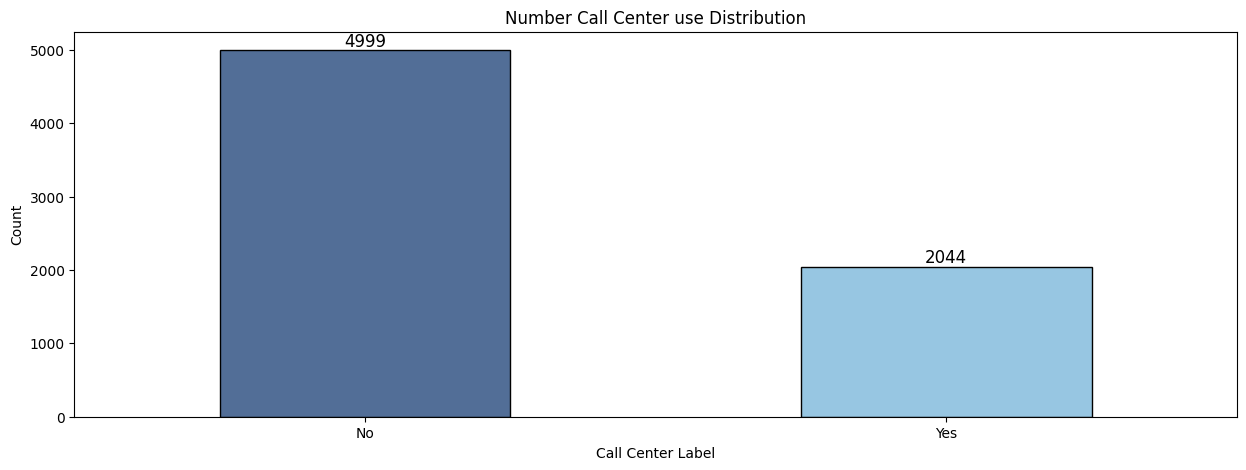

In [57]:
# observing the distribution of call center
plt.figure(figsize=(15, 5))
callcenter = df['Call Center'].value_counts()
callcenter.plot(kind='bar',color=['#526E97','#97C6E2'],edgecolor='k')
plt.title('Number Call Center use Distribution')
plt.xlabel('Call Center Label')
plt.xticks(rotation=0)
plt.ylabel('Count')

for i, value in enumerate(callcenter):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

plt.show()

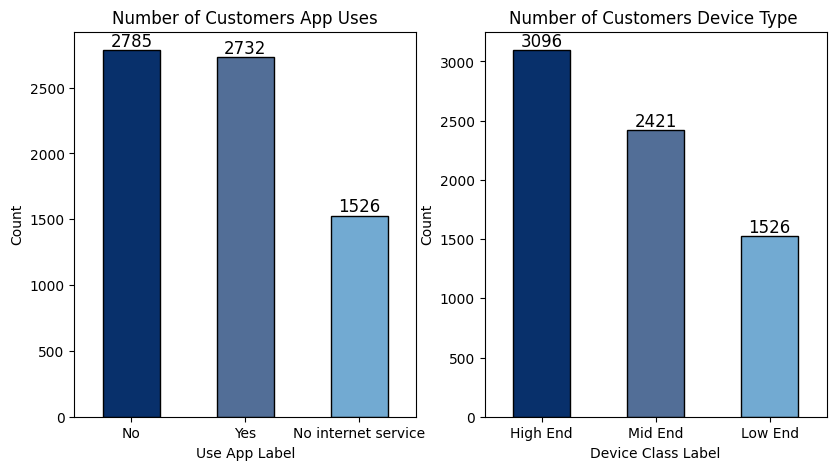

In [58]:
use_app = df['Use MyApp'].value_counts()
device = df['Device Class'].value_counts()
payment = df['Payment Method'].value_counts()
plt.figure(figsize=(15, 5))
colors = ['#08306B','#526E97', '#72AAD2', '#C4DEED', '#E3EEF8']

# plot use my app
plt.subplot(1,3,1)
use_app.plot(kind='bar',color=colors,edgecolor='k')
plt.title('Number of Customers App Uses')
plt.xlabel('Use App Label')
plt.xticks(rotation=0)
plt.ylabel('Count')

for i, value in enumerate(use_app):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

# plot device class
plt.subplot(1,3,2)
device.plot(kind='bar',color=colors,edgecolor='k')
plt.title('Number of Customers Device Type ')
plt.xlabel('Device Class Label')
plt.xticks(rotation=0)
plt.ylabel('Count')

for i, value in enumerate(device):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

plt.show()

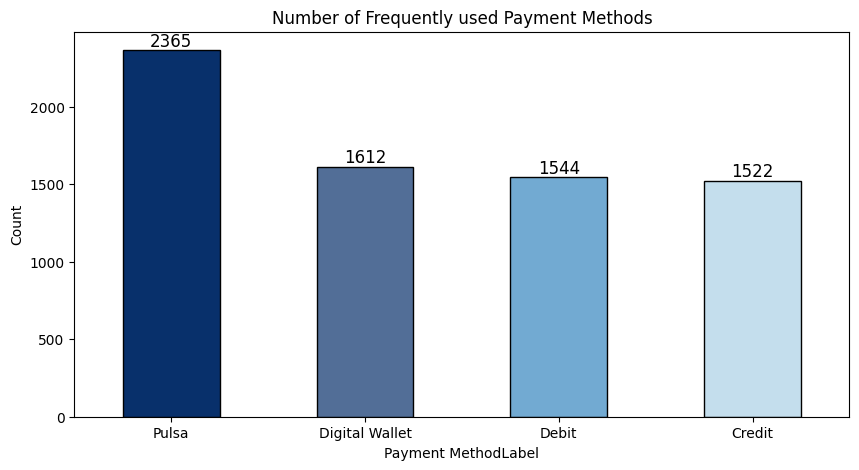

In [59]:
# plot payment method
plt.figure(figsize=(10,5))
payment.plot(kind='bar',color=colors,edgecolor='k')
plt.title('Number of Frequently used Payment Methods')
plt.xlabel('Payment MethodLabel')
plt.xticks(rotation=0)
plt.ylabel('Count')

for i, value in enumerate(payment):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

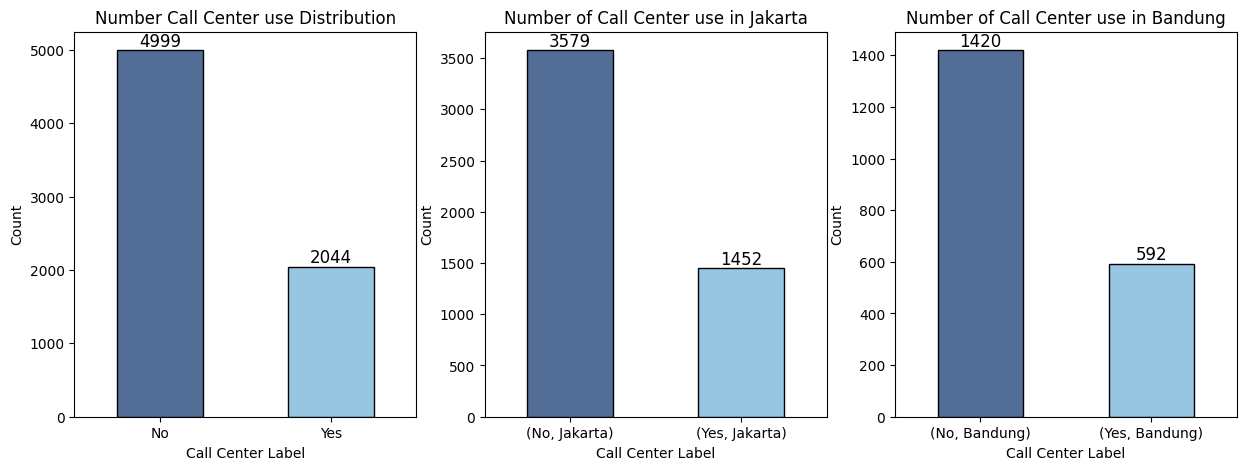

In [60]:
jakarta = df[df['Location'] == 'Jakarta'].groupby('Call Center')['Location'].value_counts()
bandung = df[df['Location'] == 'Bandung'].groupby('Call Center')['Location'].value_counts()

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
callcenter = df['Call Center'].value_counts()
callcenter.plot(kind='bar',color=['#526E97','#97C6E2'],edgecolor='k')
plt.title('Number Call Center use Distribution')
plt.xlabel('Call Center Label')
plt.xticks(rotation=0)
plt.ylabel('Count')

for i, value in enumerate(callcenter):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

# plot jakarta
plt.subplot(1,3,2)
jakarta.plot(kind='bar',color=['#526E97','#97C6E2'],edgecolor='k')
plt.title('Number of Call Center use in Jakarta')
plt.xlabel('Call Center Label')
plt.xticks(rotation=0)
plt.ylabel('Count')

for i, value in enumerate(jakarta):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)
# plot bandung
plt.subplot(1,3,3)
bandung.plot(kind='bar',color=['#526E97','#97C6E2'],edgecolor='k')
plt.title('Number of Call Center use in Bandung')
plt.xlabel('Call Center Label')
plt.xticks(rotation=0)
plt.ylabel('Count')

for i, value in enumerate(bandung):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)
plt.show()

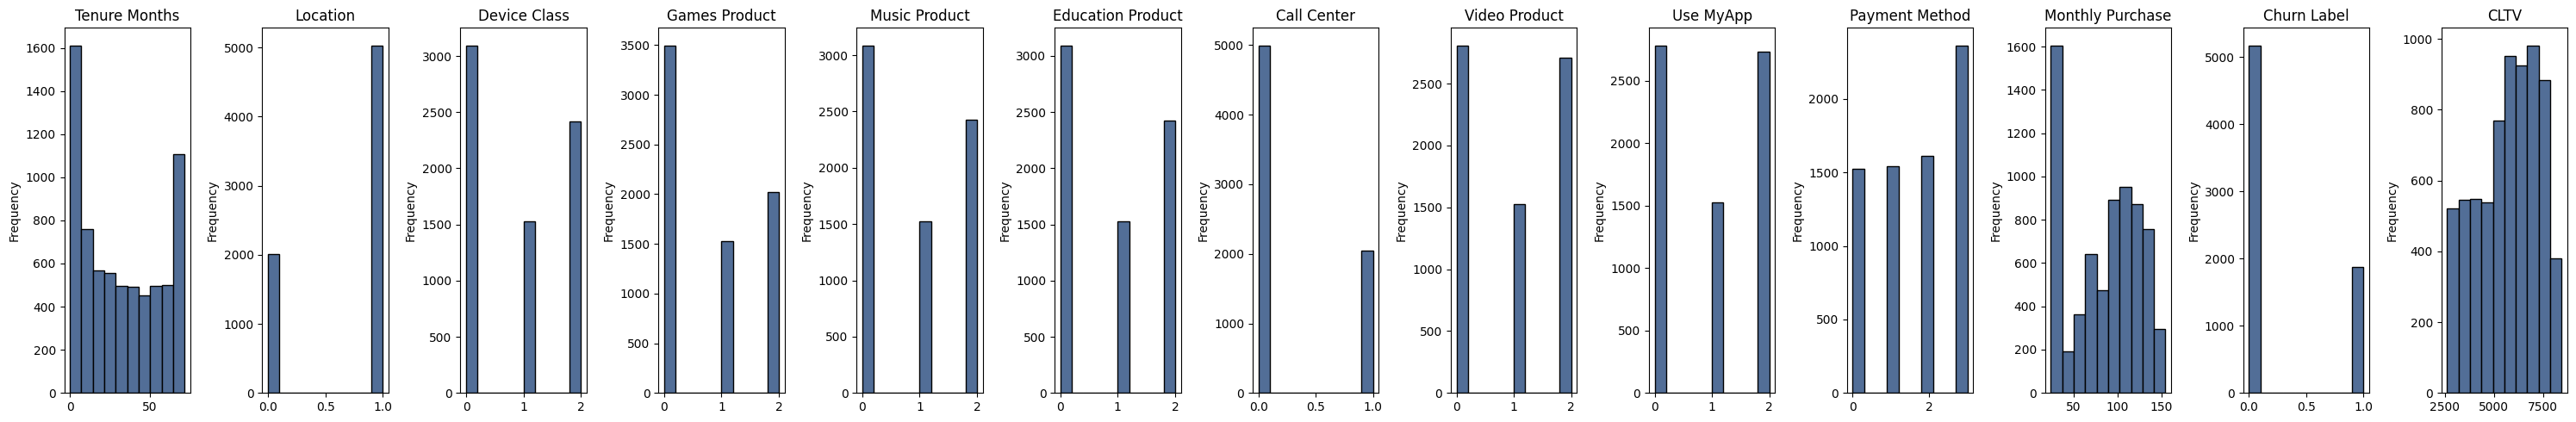

In [61]:
# observing the distribution of data using hist
cols = ['Tenure Months', 'Location', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center', 'Video Product',
       'Use MyApp', 'Payment Method', 'Monthly Purchase', 'Churn Label',
       'CLTV']
numerical = cols

plt.figure(figsize=(30, 5))
for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i + 1)
    cleaned_df[str(col)].plot(kind='hist', color='#526E97', edgecolor='k')
    ax.set_title(f"{col}")

plt.tight_layout()
plt.show()

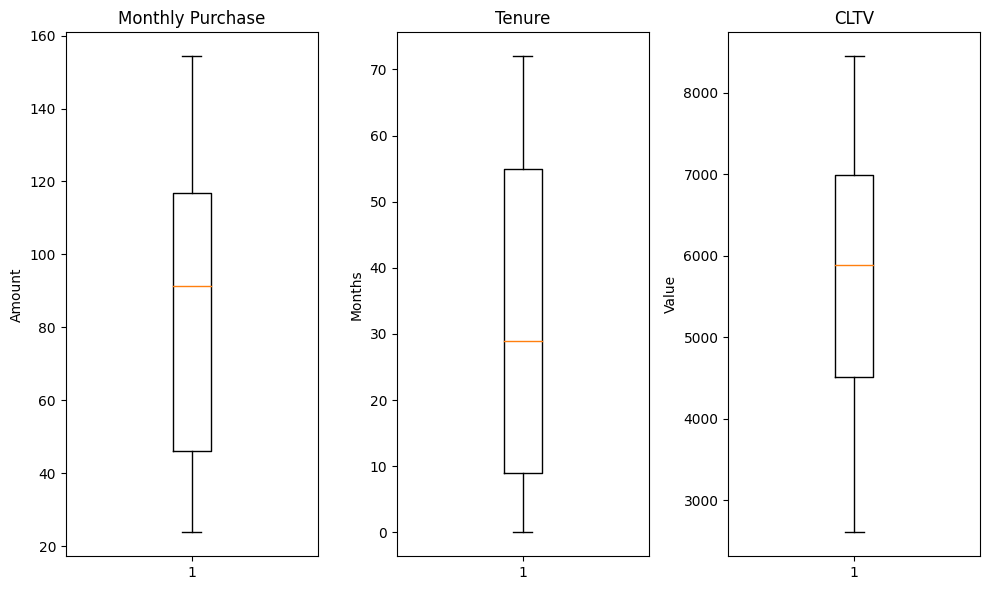

In [62]:
plt.figure(figsize=(10, 6))

# Box plot Monthly Purchase
plt.subplot(131)
plt.boxplot(df['Monthly Purchase'])
plt.title('Monthly Purchase')
plt.ylabel('Amount')

# Box plot Tenure Months
plt.subplot(132)
plt.boxplot(df['Tenure Months'])
plt.title('Tenure')
plt.ylabel('Months')

# Box plot CLTV
plt.subplot(133)
plt.boxplot(df['CLTV'])
plt.title('CLTV')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

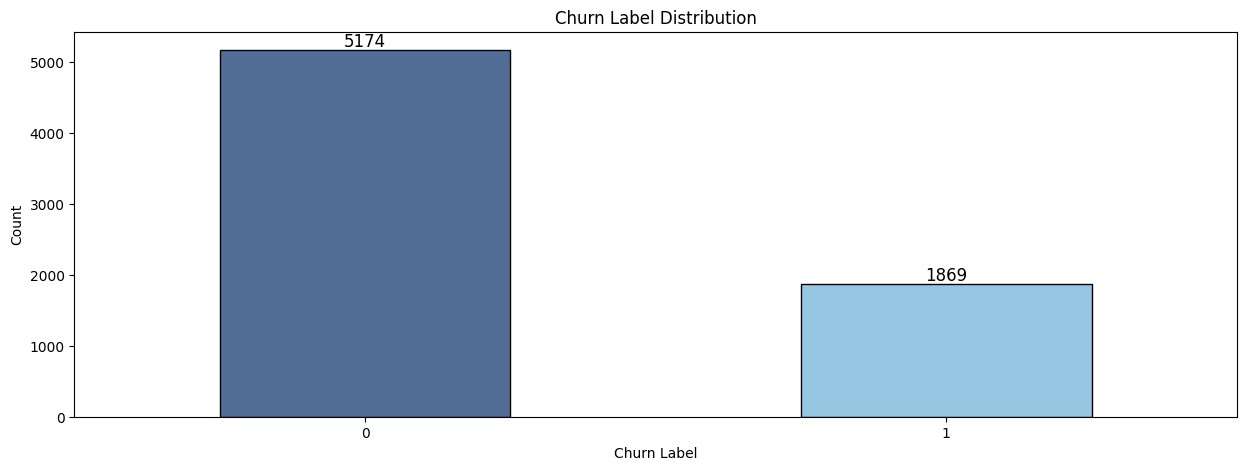

In [63]:
# observing the distribution of churn data
plt.figure(figsize=(15, 5))
churn_label = cleaned_df['Churn Label'].value_counts()
churn_label.plot(kind='bar',color=['#526E97','#97C6E2'],edgecolor='k')
plt.title('Churn Label Distribution')
plt.xlabel('Churn Label')
plt.xticks(rotation=0)
plt.ylabel('Count')

for i, value in enumerate(churn_label):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

plt.show()

In [64]:
print(churn_label)

0    5174
1    1869
Name: Churn Label, dtype: int64


<ipython-input-65-bfa7270613b2>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df[col])
<ipython-input-65-bfa7270613b2>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df[col])
<ipython-input-65-bfa7270613b2>:11: UserWarning: 

`distplot` is a deprecated function and will be

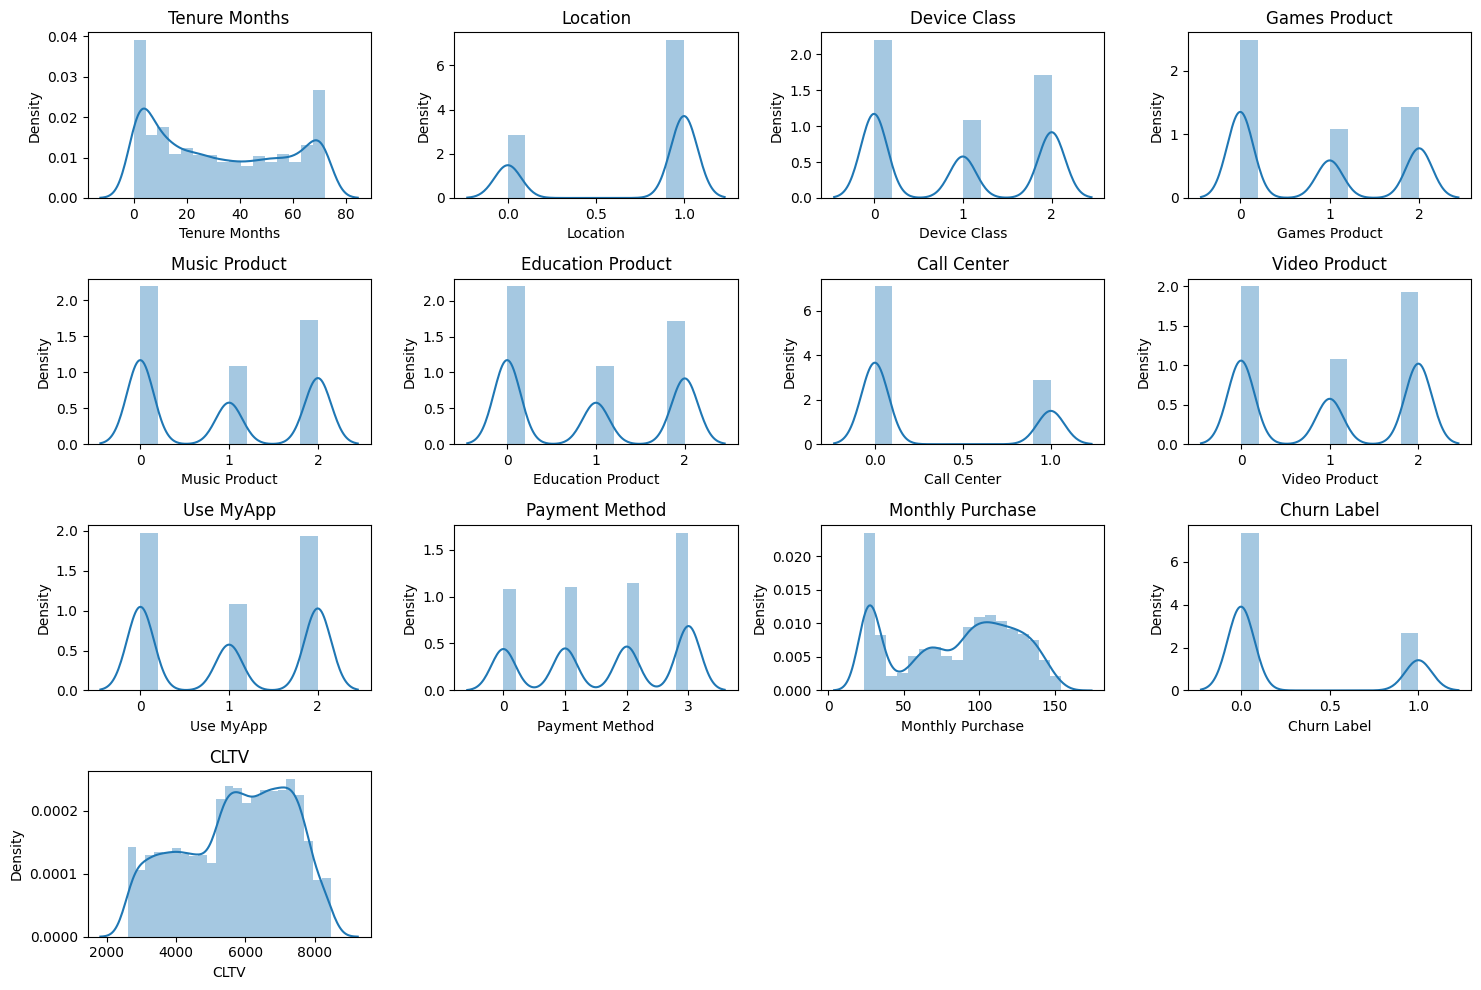

In [65]:
# observing the distribution of data
cols = ['Tenure Months', 'Location', 'Device Class', 'Games Product',
        'Music Product', 'Education Product', 'Call Center', 'Video Product',
        'Use MyApp', 'Payment Method', 'Monthly Purchase', 'Churn Label',
        'CLTV']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cols):
    plt.subplot(4, 4, i + 1)
    sns.distplot(cleaned_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


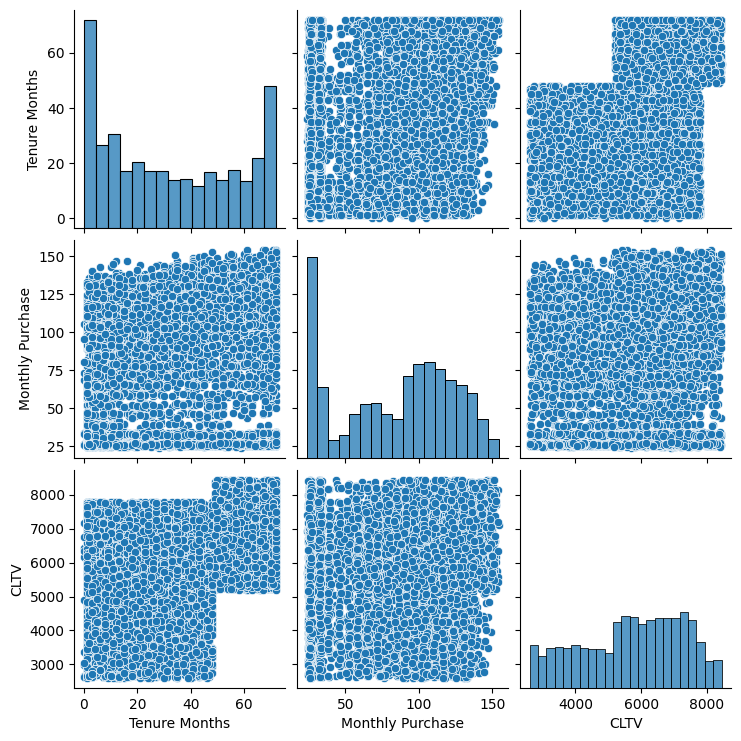

In [66]:
sns.pairplot(cleaned_df[['Tenure Months', 'Monthly Purchase', 'CLTV']])

# **Multivariate Analysis** : Correlation Heatmap



<ipython-input-67-12a88f016bb4>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cleaned_df.corr(),dtype=np.bool))


Text(0.5, 1.0, 'Feature Correlation Heatmap')

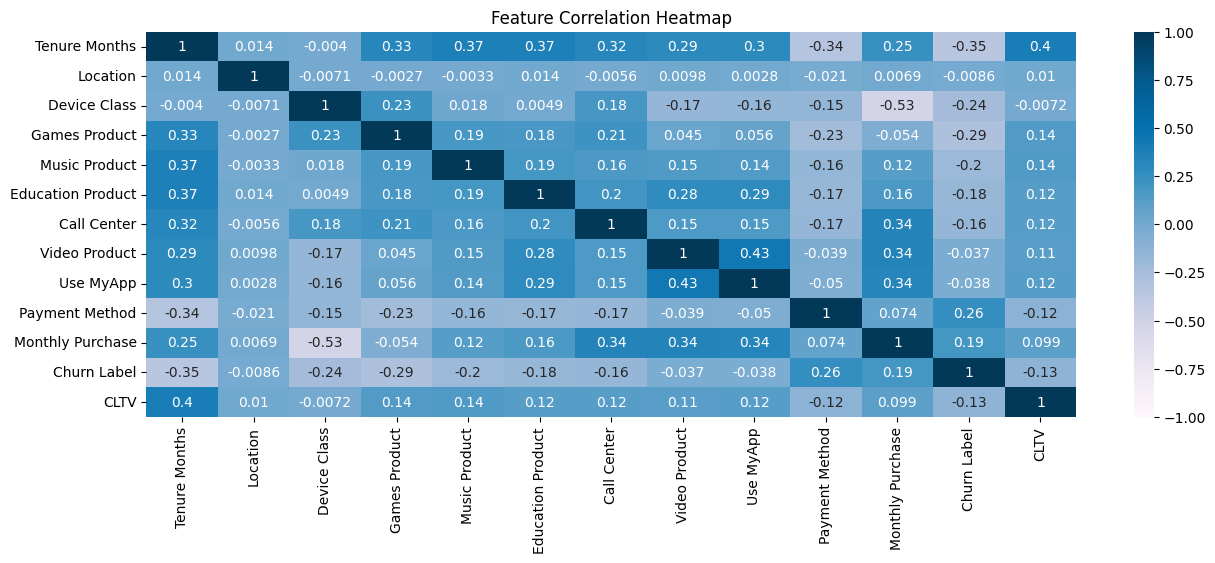

In [67]:
# displays the correlation matrix between various variables in the data
plt.figure(figsize=(15,5))
mask = np.triu(np.ones_like(cleaned_df.corr(),dtype=np.bool))
heatmap = sns.heatmap(cleaned_df.corr(),vmin= -1,vmax=1, annot=True,cmap="PuBu")
heatmap.set_title('Feature Correlation Heatmap')

# **Split Data** :  Train & Test

In [68]:
X = cleaned_df.drop('Churn Label', axis=1)
y = cleaned_df['Churn Label']

In [69]:
X.shape, y.shape

((7043, 12), (7043,))

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
X_scaled[0]

array([-1.23672422,  0.63239267,  1.24547707,  1.40732123,  1.24254983,
       -1.02791014, -0.63943864, -1.11349541, -1.12140513,  0.27474372,
       -0.36266036, -0.98167549])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(5634, 12)
(1409, 12)
(5634,)
(1409,)
0    0.739262
1    0.260738
Name: Churn Label, dtype: float64
0    0.716111
1    0.283889
Name: Churn Label, dtype: float64


# **Modeling** : Logistic Regression

In [73]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print('Logistic Regression model: \n', log_model)


Logistic Regression model: 
 LogisticRegression()


In [74]:
y_train_pred = log_model.predict(X_train)

print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      4165
           1       0.64      0.49      0.56      1469

    accuracy                           0.80      5634
   macro avg       0.74      0.70      0.71      5634
weighted avg       0.79      0.80      0.79      5634



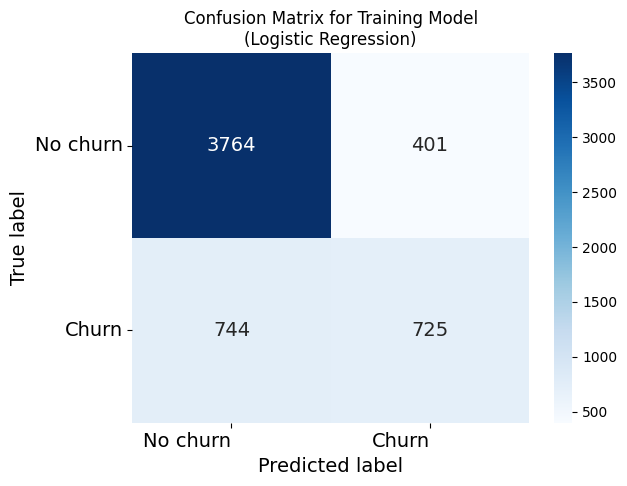

In [75]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# **Data test performance**

In [76]:
y_test_pred = log_model.predict(X_test)

print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1009
           1       0.65      0.51      0.57       400

    accuracy                           0.78      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409



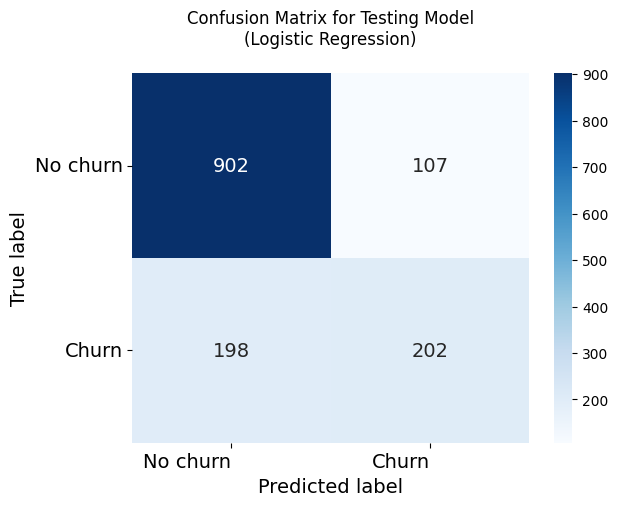

In [77]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)),('No churn','Churn'),('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [78]:
log_cv_score = cross_val_score(log_model, X, y, cv=10, scoring='roc_auc')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [79]:
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_test_pred))
print('\n')
print("Classification Report :")
print(classification_report(y_test, y_test_pred))
print('\n')
print("All AUC Scores :")
print(log_cv_score)
print('\n')
print("Mean AUC Score :")
print("Mean AUC Score - Logistic Regression : ", log_cv_score.mean())

Confusion Matrix :
[[902 107]
 [198 202]]


Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1009
           1       0.65      0.51      0.57       400

    accuracy                           0.78      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409



All AUC Scores :
[0.81252452 0.85927983 0.83304772 0.84047208 0.82636353 0.79565366
 0.82028155 0.80926571 0.80893472 0.82431395]


Mean AUC Score :
Mean AUC Score - Logistic Regression :  0.8230137264348834


# **Modeling** : Random Forest Classifier

In [80]:
rdf_model = RandomForestClassifier()
rdf_model.fit(X_train, y_train)
print(rdf_model)

RandomForestClassifier()


In [81]:
y_train_pred = rdf_model.predict(X_train)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4165
           1       1.00      1.00      1.00      1469

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



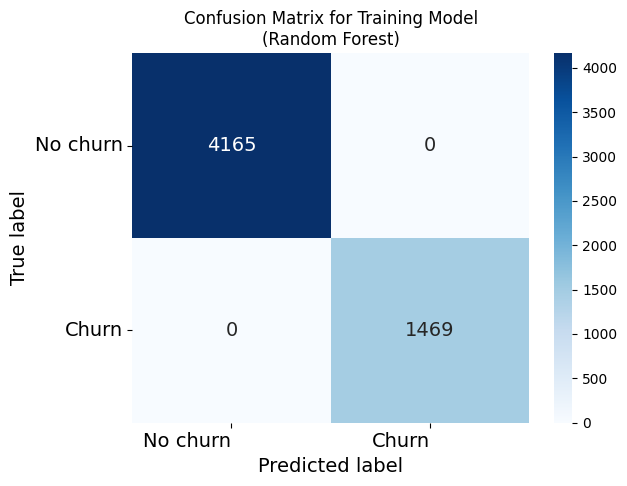

In [82]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# **datatest performance**

In [83]:
y_test_pred = rdf_model.predict(X_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1009
           1       0.64      0.48      0.55       400

    accuracy                           0.77      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.76      0.77      0.76      1409



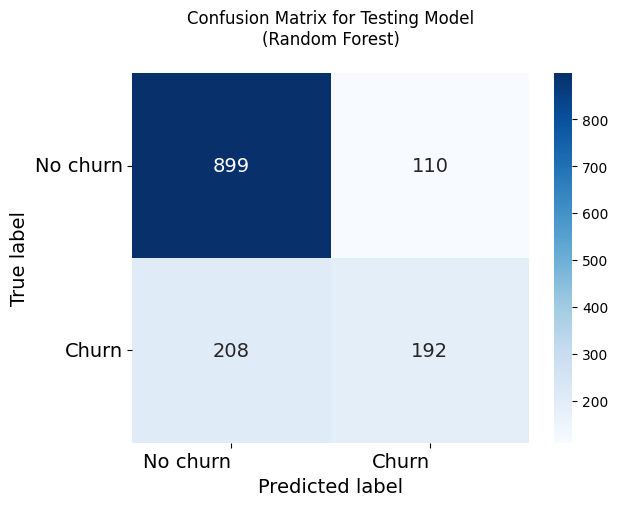

In [84]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

# **Model Evaluation**

In [85]:
# random forest model evaluation
rfc_cv_score = cross_val_score(rdf_model, X, y, cv=10, scoring='roc_auc')

In [86]:
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_test_pred))
print('\n')
print("Classification Report :")
print(classification_report(y_test, y_test_pred))
print('\n')
print("All AUC Scores :")
print(rfc_cv_score)
print('\n')
print("Mean AUC Score :")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Confusion Matrix :
[[899 110]
 [208 192]]


Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1009
           1       0.64      0.48      0.55       400

    accuracy                           0.77      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.76      0.77      0.76      1409



All AUC Scores :
[0.79491772 0.82828856 0.82630128 0.8245017  0.79483135 0.79029572
 0.81337726 0.79483652 0.80072198 0.81834081]


Mean AUC Score :
Mean AUC Score - Random Forest:  0.8086412901372675


# **Elbow Method**

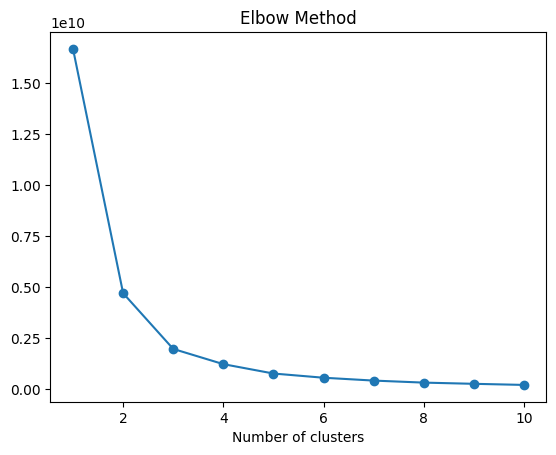

In [87]:
features = df[['Tenure Months', 'Monthly Purchase', 'CLTV']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss,marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('')
plt.show()

# **RFM Model**

In [88]:
spending = df.groupby('Customer ID')['Monthly Purchase'].sum()
spending = spending.reset_index()
spending.head()

,Customer ID,Monthly Purchase
0,0,70.005
1,1,91.910
2,2,129.545
3,3,136.240
4,4,134.810


In [89]:
tenure = df.groupby('Customer ID')['Tenure Months'].sum()
tenure = tenure.reset_index()
tenure.head()

,Customer ID,Tenure Months
0,0,2
1,1,2
2,2,8
3,3,28
4,4,49


In [90]:
cltv = df.groupby('Customer ID')['CLTV'].sum()
cltv = cltv.reset_index()
cltv.head()

,Customer ID,CLTV
0,0,4210.7
1,1,3511.3
2,2,6983.6
3,3,6503.9
4,4,6942.0


In [91]:
rfm = pd.merge(pd.merge(tenure, spending, on='Customer ID'), cltv, on='Customer ID', how='inner')
rfm.head()

,Customer ID,Tenure Months,Monthly Purchase,CLTV
0,0,2,70.005,4210.7
1,1,2,91.910,3511.3
2,2,8,129.545,6983.6
3,3,28,136.240,6503.9
4,4,49,134.810,6942.0


In [92]:
scaler = StandardScaler()
features = rfm[['Tenure Months', 'Monthly Purchase', 'CLTV']]

In [93]:
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-1.23672422, -0.36266036, -0.98167549],
       [-1.23672422,  0.19736523, -1.4364618 ],
       [-0.99240204,  1.1595457 ,  0.82140853],
       ...,
       [ 1.61370124,  1.27753328,  0.98033014],
       [-0.87024095, -1.1686319 , -1.35869165],
       [ 1.36937906,  1.35896134,  0.58894341]])

In [94]:
scaled_features = pd.DataFrame(scaled_features)
scaled_features.columns = ['Tenure Months', 'Monthly Purchase', 'CLTV']
scaled_features.head()

,Tenure Months,Monthly Purchase,CLTV
0,-1.236724,-0.362660,-0.981675
1,-1.236724,0.197365,-1.436462
2,-0.992402,1.159546,0.821409
3,-0.177995,1.330711,0.509483
4,0.677133,1.294151,0.794358


# **Customer Segmentation**

In [95]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [96]:
kmeans.labels_

array([4, 3, 1, ..., 2, 4, 2], dtype=int32)

In [97]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    # Initialize KMeans with a higher max_iter and a different initialization method
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100, init='random')
    kmeans.fit(scaled_features)
    cluster_labels = kmeans.labels_

    # Check silhouette score
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.33913521875678754
For n_clusters=3, the silhouette score is 0.32772095122791284
For n_clusters=4, the silhouette score is 0.33673731718713135
For n_clusters=5, the silhouette score is 0.3558815604539174
For n_clusters=6, the silhouette score is 0.35323466678518756
For n_clusters=7, the silhouette score is 0.32215699294363914
For n_clusters=8, the silhouette score is 0.3142582496471172


In [98]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [99]:
kmeans.labels_

array([4, 3, 1, ..., 2, 4, 2], dtype=int32)

In [100]:
rfm['Cluster ID'] = kmeans.labels_
rfm.head()

,Customer ID,Tenure Months,Monthly Purchase,CLTV,Cluster ID
0,0,2,70.005,4210.7,4
1,1,2,91.910,3511.3,3
2,2,8,129.545,6983.6,1
3,3,28,136.240,6503.9,2
4,4,49,134.810,6942.0,2


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '1'),
  Text(3, 0, '4'),
  Text(4, 0, '0')])

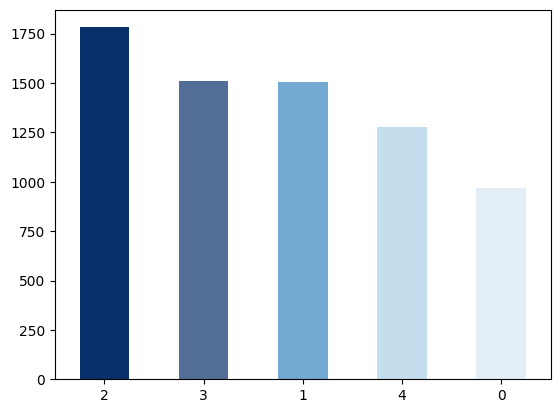

In [101]:
cluster = rfm['Cluster ID'].value_counts()
colors = ['#08306B','#526E97', '#72AAD2', '#C4DEED', '#E3EEF8']
cluster.plot(kind='bar',color=colors)
plt.xticks(rotation=0)

               min      max
Cluster ID                 
0           23.725   83.460
1           24.375  143.130
2           81.250  154.375
3           63.960  151.125
4           24.310   76.635


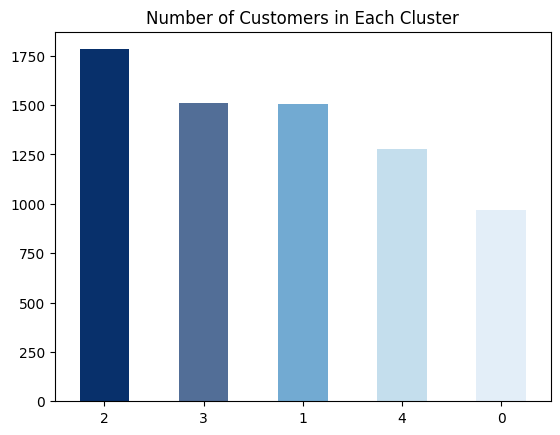

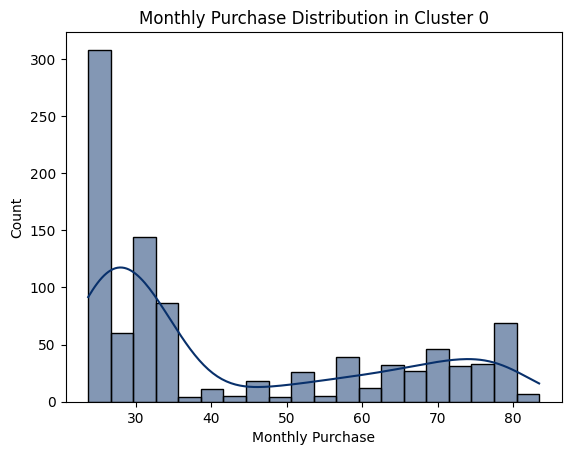

In [118]:
cluster_min_max = rfm.groupby('Cluster ID')['Monthly Purchase'].agg(['min', 'max'])

# Print the results
print(cluster_min_max)

# Plotting the bar chart for each cluster
colors = ['#08306B', '#526E97', '#72AAD2', '#C4DEED', '#E3EEF8']
cluster.plot(kind='bar', color=colors)
plt.xticks(rotation=0)
plt.title('Number of Customers in Each Cluster')
plt.show()

# Plotting the bar chart for Monthly Purchase in Cluster 0
cluster_0 = rfm[rfm['Cluster ID'] == 0]
sns.histplot(data=cluster_0, x='Monthly Purchase', bins=20, kde=True, color='#08306B')
plt.title('Monthly Purchase Distribution in Cluster 0')
plt.show()

In [119]:
minmax_monthlypurchase = rfm.groupby('Cluster ID')['Monthly Purchase'].agg(['min', 'max'])
print(minmax_monthlypurchase)

minmax_cltv = rfm.groupby('Cluster ID')['CLTV'].agg(['min', 'max'])
print(minmax_cltv)

minmax_tenure = rfm.groupby('Cluster ID')['Tenure Months'].agg(['min', 'max'])
print(minmax_tenure)

               min      max
Cluster ID                 
0           23.725   83.460
1           24.375  143.130
2           81.250  154.375
3           63.960  151.125
4           24.310   76.635
               min     max
Cluster ID                
0           4734.6  8448.7
1           5081.7  7797.4
2           4839.9  8450.0
3           2603.9  5876.0
4           2605.2  6635.2
            min  max
Cluster ID          
0            20   72
1             0   41
2            26   72
3             0   48
4             0   48


# **Clustering Visualization**

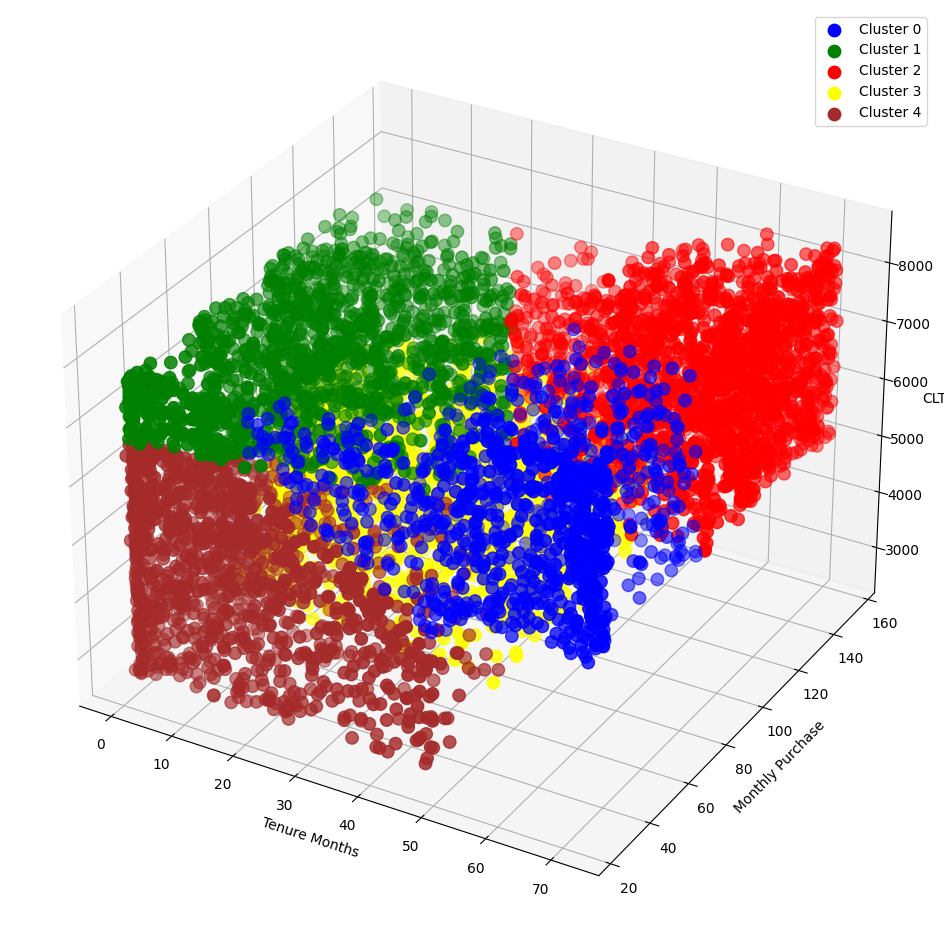

In [103]:
fig = plt.figure(figsize=(15,12))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm["Tenure Months"][rfm["Cluster ID"] == 0], rfm["Monthly Purchase"][rfm["Cluster ID"] == 0], rfm["CLTV"][rfm["Cluster ID"] == 0], c='blue', s=80, label='Cluster 0')
ax.scatter(rfm["Tenure Months"][rfm["Cluster ID"] == 1], rfm["Monthly Purchase"][rfm["Cluster ID"] == 1], rfm["CLTV"][rfm["Cluster ID"] == 1], c='green', s=80, label='Cluster 1')
ax.scatter(rfm["Tenure Months"][rfm["Cluster ID"] == 2], rfm["Monthly Purchase"][rfm["Cluster ID"] == 2], rfm["CLTV"][rfm["Cluster ID"] == 2], c='red', s=80, label='Cluster 2')
ax.scatter(rfm["Tenure Months"][rfm["Cluster ID"] == 3], rfm["Monthly Purchase"][rfm["Cluster ID"] == 3], rfm["CLTV"][rfm["Cluster ID"] == 3], c='yellow', s=80, label='Cluster 3')
ax.scatter(rfm["Tenure Months"][rfm["Cluster ID"] == 4], rfm["Monthly Purchase"][rfm["Cluster ID"] == 4], rfm["CLTV"][rfm["Cluster ID"] == 4], c='brown', s=80, label='Cluster 4')

ax.set_xlabel("Tenure Months")
ax.set_ylabel("Monthly Purchase")
ax.set_zlabel("CLTV")
ax.legend()
plt.show()

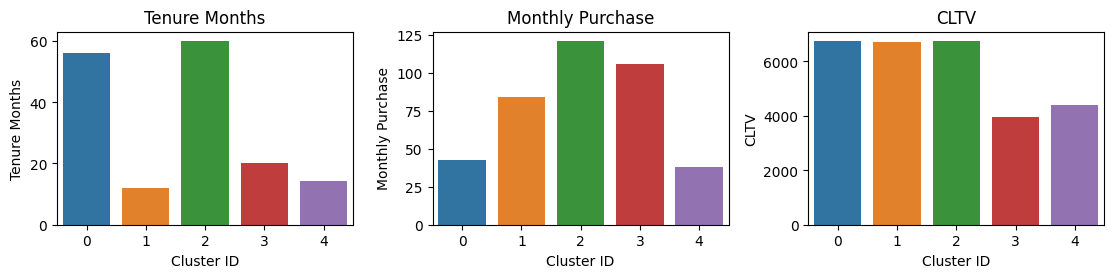

In [104]:
cluster_means = rfm.groupby('Cluster ID').mean().reset_index()

cols = ['Tenure Months','Monthly Purchase', 'CLTV']

plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.5)

for i, col in enumerate(cols):
    plt.subplot(4, 4, i + 1)
    sns.barplot(x='Cluster ID', y= cluster_means[col], data=cluster_means)
    plt.title(col)

plt.tight_layout()
plt.show()

In [105]:
cluster_means

,Cluster ID,Customer ID,Tenure Months,Monthly Purchase,CLTV
0,0,4370.172699,56.014478,42.742642,6758.756463
1,1,2933.013944,11.833333,84.204522,6702.004980
2,2,3956.891695,60.067340,121.302730,6753.128676
3,3,2874.335099,20.210596,106.242414,3970.647682
4,4,3727.621283,14.432707,37.730771,4405.303286
